<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/ROC_AUC_curve_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score , confusion_matrix

weights = np.array([50,55,60,65,70,85,90,100]).reshape(-1,1)
obese = np.array([0,0,0,1,0,1,1,1])

model = LogisticRegression()
model.fit(weights,obese)
probd = model.predict_proba(weights)[:,1]

In [9]:
# Define function to print confusion matrix for a given threshold
def print_confusion_matrix(threshold):
    predictions = (probd >= threshold).astype(int)
    cm = confusion_matrix(obese, predictions)
    print(f"Threshold: {threshold:.2f}")
    print("Confusion Matrix:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
    print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
    print("\n")


In [10]:
# diffrent thresholds to demonstrate changes in confusion matrix
thresholds = [0.2,0.4,0.5,0.6,0.8]

In [13]:
# calculate ROC curve for plotting
fpr, tpr, roc_thresholds = roc_curve(obese, probd)
auc = roc_auc_score(obese,probd)

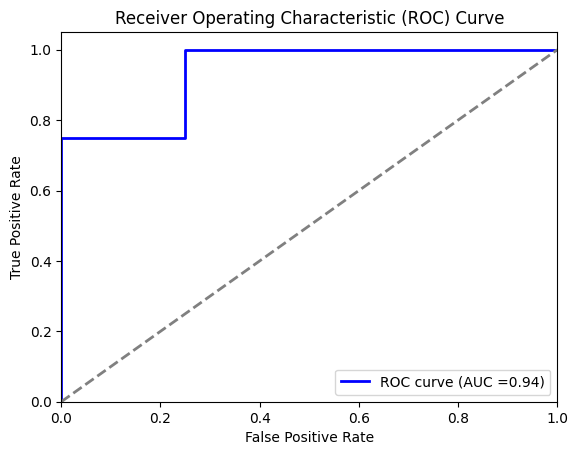

Threshold: 0.20
Confusion Matrix:
[[3 1]
 [0 4]]
True Positives (TP): 4
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 0
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 0.25


Threshold: 0.40
Confusion Matrix:
[[3 1]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.25


Threshold: 0.50
Confusion Matrix:
[[3 1]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.25


Threshold: 0.60
Confusion Matrix:
[[4 0]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 0
True Negatives (TN): 4
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.00


Threshold: 0.80
Confusion Matrix:
[[4 0]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 0
True Negatives (TN): 4
False Negatives (FN): 1
True Positive Rate (TPR):

In [14]:
# plot ROC curve
plt.figure()
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (AUC ={auc:.2f})')
plt.plot([0,1],[0,1],color='gray',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# print confusion matrix for each threshold
for threshold in thresholds:
  print_confusion_matrix(threshold)